# 4장 이벤트 핸들링

사용자가 웹 브라우저에서 DOM 요소들과 상호 작용하는 것을 이벤트(event)라고 합니다.

ex)

- 마우스 커서를 올렸을 때는 onmouseover 이벤트를 실행
- 클릭했을 때는 onclick 이벤트를 실행

# 4.1 리액트의 이벤트 시스템

# 4.1.1 이벤트를 사용할 때 주의사항
(1) 이벤트 이름은 카멜 표기법으로 작성합니다

- 예를 들어 HTML의 onclick은 리액트에서는 onClick으로 작성해야 합니다. 또 onkeyup은 onKeyUp으로 작성합니다.

(2) 이벤트에 실행할 자바스크립트 코드를 전달하는 것이 아니라, 함수 형태의 값을 전달합니다

- HTML에서 이벤트를 설정할 때는 큰따옴표 안에 실행할 코드를 넣었지만, 리액트에서는 함수 형태의 객체를 전달합니다.

(3) DOM 요소에만 이벤트를 설정할 수 있습니다
- div, button, input, form, span 등의 DOM 요소에는 이벤트를 설정할 수 있지만, 우리가 직접 만든 컴포넌트에는 이벤트를 자체적으로 설정할 수 없습니다.

- 예를들어
```js
<MyComponent onClick={doSomething}/>
```
다음 코는 MyComponent를 클릭할 때 doSomething 함수를 실행하는 것이 아니라, 그냥 이름이 onClick인 props를 MyComponent에게 전달해 줄 뿐입니다.



# 4.1.2 이벤트 종류

• Clipboard

• Composition

• Keyboard

• Focus

• Form

• Mouse

• Selection

• Touch

• UI

• Wheel

• Media

• Image

• Animation

• Transition

# 4.2 예제로 이벤트 핸들링 익히기

이번에 실습해볼 각 단계

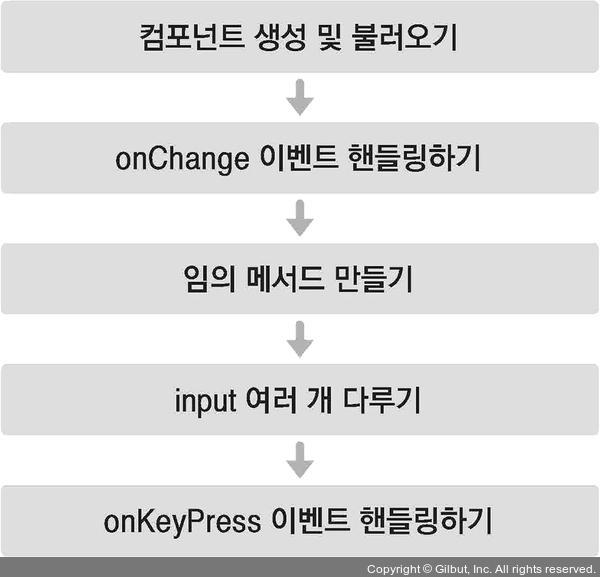

# 4.2.1 컴포넌트 생성 및 불러오기

(1) 컴포넌트 생성

src 디렉터리 안에 EventPractice.js 파일 생성
```js
import React, { Component } from 'react';

class EventPractice extends Component {
  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
      </div>
    );
  }
}

export default EventPractice;
```

(2) App.js에서 EventPractice 렌더링
```js
import React from 'react';
import EventPractice from './EventPractice';

const App = () => {
return <EventPractice />;
};

export default App;
```

# 4.2.2 onChange 이벤트 핸들링하기

(1) onChange 이벤트 설정

```js
import React, { Component } from 'react';

class EventPractice extends Component {
  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
        <input
          type="text"
          name="message"
          placeholder="아무거나 입력해 보세요"
          onChange={
            (e) => {
              console.log(e);
            }
          }
        />
      </div>
    );
  }
}

export default EventPractice;
```
onChange부분 코드 수정
```js
onChange={
  (e) => {
    console.log(e.target.value);
  }
}
```
값이 바뀔 때마다 바뀌는 값을 콘솔에 기록

(2) state에 input 값 담기
- 생성자 메서드인 constructor에서 state 초깃값을 설정
- 이벤트 핸들링 함수 내부에서 this.setState 메서드를 호출하여 state를 업데이트
- input의 value 값을 state에 있는 값으로 설정

```js
import React, { Component } from 'react';

class EventPractice extends Component {

  state = {
    message: ''
  }

  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
        <input
          type="text"
          name="message"
          placeholder="아무거나 입력해 보세요"
          value={this.state.message}
          onChange={
            (e) => {
              this.setState({
                message: e.target.value
              })
            }
          }
        />
      </div>
    );
  }
}

export default EventPractice;
```

(3) 버튼을 누를 때 comment 값을 공백으로 설정

```js
import React, { Component } from 'react';

class EventPractice extends Component {

  state = {
    message: ''
  }

  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
        <input
          (...)
        />
        <button onClick={
          () => {
            alert(this.state.message);
            this.setState({
              message: ''
            });
          }
        }>확인</button>
      </div>
    );
  }
}

export default EventPractice;
```
입력하면 메시지 박스로 출력되도록 하는 코드

# 4.2.3 임의 메서드 만들기

주의사항 중“이벤트에 실행할 자바스크립트 코드를 전달하는 것이 아니라, 함수 형태의 값을 전달합니다”라는 말을 기억하자

-> 이벤트를 처리할 때 렌더링을 하는 동시에 함수를 만들어서 전달해 주었습니다

onChange와 onClick에 전달한 함수를 따로 빼내서 컴포넌트 임의 메서드를 만들어 보겠습니다.

(1) 기본방식
```js
import React, { Component } from 'react';

class EventPractice extends Component {

  state = {
    message: ''
  }

  constructor(props) {
    super(props);
    this.handleChange = this.handleChange.bind(this);
    this.handleClick = this.handleClick.bind(this);
  }

  handleChange(e) {
    this.setState({
      message: e.target.value
    });
  }

  handleClick() {
    alert(this.state.message);
    this.setState({
      message: ''
    });
  }

  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
        <input
          type="text"
          name="message"
          placeholder="아무거나 입력해 보세요"
          value={this.state.message}
          onChange={this.handleChange}
        />
        <button onClick={this.handleClick}>확인</button>
      </div>
    );
  }
}

export default EventPractice;
```
함수가 호출될 때 this는 호출부에 따라 결정되므로, 클래스의 임의 메서드가 특정 HTML 요소의 이벤트로 등록되는 과정에서 메서드와 this의 관계가 끊어져 버립니다.

- 이 때문에 임의 메서드가 이벤트로 등록되어도 this를 컴포넌트 자신으로 제대로 가리키기 위해서는 메서드를 this와 바인딩(binding)하는 작업이 필요합니다.
- 만약 바인딩하지 않는 경우라면 this가 undefined를 가리키게 됩니다.

(2) Property Initializer Syntax를 사용한 메서드 작성

기본작업을 간단하게 하는 방법
: 바벨의 transform-class-properties 문법을 사용하여 화살표 함수 형태로 메서드를 정의하는 것

```js
import React, { Component } from 'react';

class EventPractice extends Component {

  state = {
    message: ''
  }

  handleChange = (e) => {
    this.setState({
      message: e.target.value
    });
  }

  handleClick = () => {
    alert(this.state.message);
    this.setState({
      message: ''
    });
  }

  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
        <input
          type="text"
          name="message"
          placeholder="아무거나 입력해 보세요"
          value={this.state.message}
          onChange={this.handleChange}
        />
        <button onClick={this.handleClick}>확인</button>
      </div>
    );
  }
}

export default EventPractice;

```


# 4.2.4 input 여러 개 다루기

event 객체를 활용하는 것입니다

: e.target.name 값을 사용하면 됩니다

```js
import React, { Component } from 'react';

class EventPractice extends Component {

  state = {
    username: '',
    message: ''
  }

  handleChange = (e) => {
    this.setState({
      [e.target.name]: e.target.value
    });
  }

  handleClick = () => {
    alert(this.state.username + ': ' + this.state.message);
    this.setState({
      username: '',
      message: ''
    });
  }

  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
        <input
          type="text"
          name="username"
          placeholder="사용자명"
          value={this.state.username}
          onChange={this.handleChange}
        />
        <input
          type="text"
          name="message"
          placeholder="아무거나 입력해 보세요"
          value={this.state.message}
          onChange={this.handleChange}
        />
        <button onClick={this.handleClick}>확인</button>
      </div>
    );
  }
}

export default EventPractice;

```
다음코드가 핵심입니다

EventPractice의 handleChange 함수
```js
handleChange = e => {
    this.setState({
      [e.target.name]: e.target.value
    });
};
```
객체 안에서 key를 [ ]로 감싸면 그 안에 넣은 레퍼런스가 가리키는 실제 값이 key 값으로 사용됩니다.

예)
```js
const name = 'variantKey';
const object = {
[name]: 'value'
};
```
결과는 다음과 같습니다
```js
{
'variantKey': 'value'
}
```

# 4.2.5 onKeyPress 이벤트 핸들링

키를 눌렀을 때 발생하는 KeyPress 이벤트를 처리하는 방법

comment 인풋에서 Enter를 눌렀을 때 handleClick 메서드를 호출하도록 코드를 작성해봅시다
```js
import React, { Component } from 'react';

class EventPractice extends Component {

  state = {
    username: '',
    message: ''
  }

  handleChange = (e) => {
    this.setState({
      [e.target.name]: e.target.value
    });
  }

  handleClick = () => {
    alert(this.state.username + ': ' + this.state.message);
    this.setState({
      username: '',
      message: ''
    });
  }

  handleKeyPress = (e) => {
    if(e.key === 'Enter') {
      this.handleClick();
    }
  }

  render() {
    return (
      <div>
        <h1>이벤트 연습</h1>
        <input
          type="text"
          name="username"
          placeholder="사용자명"
          value={this.state.username}
          onChange={this.handleChange}
        />
        <input
          type="text"
          name="message"
          placeholder="아무거나 입력해 보세요"
          value={this.state.message}
          onChange={this.handleChange}
          onKeyPress={this.handleKeyPress}
        />
        <button onClick={this.handleClick}>확인</button>
      </div>
    );
  }
}

export default EventPractice;
```


# 4.3 함수형 컴포넌트로 구현해 보기

방금했던 작업들을 함수형 컴포넌트로도 똑같이 구현할 수 있습니다

EventPractice.js
```js
import React, { useState } from 'react';

const EventPractice = () => {
  const [username, setUsername] = useState('');
  const [message, setMessage] = useState('');
  const onChangeUsername = e => setUsername(e.target.value);
  const onChangeMessage = e => setMessage(e.target.value);
  const onClick = () => {
    alert(username + ': ' + message);
    setUsername('');
    setMessage('');
  };
  const onKeyPress = e => {
    if (e.key === 'Enter') {
      onClick();
    }
  };
  return (
    <div>
      <h1>이벤트 연습</h1>
      <input
        type="text"
        name="username"
        placeholder="사용자명"
        value={username}
        onChange={onChangeUsername}
      />
      <input
        type="text"
        name="message"
        placeholder="아무거나 입력해 보세요"
        value={message}
        onChange={onChangeMessage}
        onKeyPress={onKeyPress}
      />
      <button onClick={onClick}>확인</button>
    </div>
  );
};
export default EventPractice;
```

위 코드에서는 e.target.name을 활용하지 않고 onChange 관련 함수 두 개를 따로 만들어 주었습니다.
(인풋이 두 개밖에 없다면 이런 코드도 나쁘지는 않습니다)

이번에는 useState를 통해 사용하는 상태에 문자열이 아닌 객체를 넣어 보겠습니다.
```js
import React, { useState } from 'react';

const EventPractice = () => {
  const [form, setForm] = useState({
    username: '',
    message: ''
  });
  const { username, message } = form;
  const onChange = e => {
    const nextForm = {
      ...form, // 기존의 form 내용을 이 자리에 복사한 뒤
      [e.target.name]: e.target.value // 원하는 값을 덮어 씌우기
    };
    setForm(nextForm);
  };
  const onClick = () => {
    alert(username + ': ' + message);
    setForm({
      username: '',
      message: ''
    });
  };
  const onKeyPress = e => {
    if (e.key === 'Enter') {
      onClick();
    }
  };
  return (
    <div>
      <h1>이벤트 연습</h1>
      <input
        type="text"
        name="username"
        placeholder="사용자명"
        value={username}
        onChange={onChange}
      />
      <input
        type="text"
        name="message"
        placeholder="아무거나 입력해 보세요"
        value={message}
        onChange={onChange}
        onKeyPress={onKeyPress}
      />
      <button onClick={onClick}>확인</button>
    </div>
  );
};
export default EventPractice;
```




# 4.4 정리

리액트에서 이벤트를 다루는 것

= 순수 자바스크립트 또는 jQuery를 사용한 웹 애플리케이션에서 이벤트를 다루는 것


기존 HTML DOM Event를 알고 있다면 리액트의 컴포넌트 이벤트도 쉽게 다룰 수 있을 것이다